In [1]:
import pandas as pd

df = pd.read_csv('bestsellers with categories.csv')

In [2]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.shape

(550, 7)

In [4]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [6]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

<Axes: title={'center': 'Розподіл цін'}, ylabel='Frequency'>

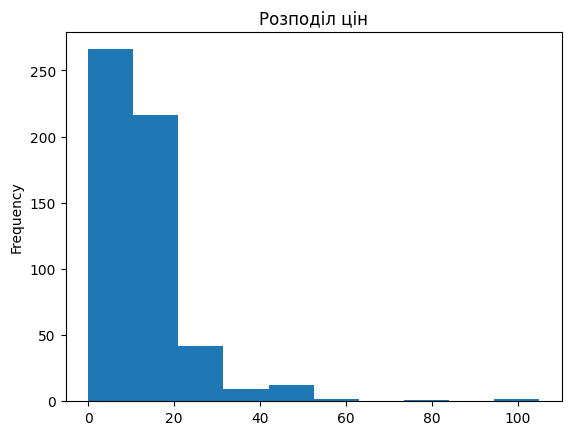

In [7]:
df['price'].plot(kind='hist', title='Розподіл цін')

In [10]:
max_price = df['price'].max()
# Мінімальна ціна
min_price = df['price'].min()
# Середня ціна
mean_price = df['price'].mean()
# Медіанна ціна
median_price = df['price'].median()

max_price, min_price, mean_price, median_price

(105, 0, 13.1, 11.0)

In [11]:
max_rating = df['user_rating'].max()
max_rating

4.9

In [12]:
count_max_rating = df[df['user_rating'] == max_rating].shape[0]
count_max_rating

52

In [13]:
most_reviews = df[df['reviews'] == df['reviews'].max()]['name'].values[0]
most_reviews

'Where the Crawdads Sing'

In [14]:
expensive_2015 = df[df['year'] == 2015].sort_values(by='price', ascending=False).iloc[0]
expensive_2015['name']

'Publication Manual of the American Psychological Association, 6th Edition'

In [15]:
fiction_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]
fiction_2010

20

In [16]:
rating_49_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
rating_49_2010_2011

1

In [17]:
sorted_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book_2015 = sorted_2015.iloc[-1]['name']
last_book_2015

'Old School (Diary of a Wimpy Kid #10)'

In [18]:
price_stats = df.groupby('genre')['price'].agg(['max', 'min'])
price_stats

,max,min
genre,,
Fiction,82,0
Non Fiction,105,0


In [19]:
author_counts = df.groupby('author')['name'].count().reset_index()
author_counts.columns = ['author', 'book_count']
author_counts

,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [20]:
author_ratings = df.groupby('author')['user_rating'].mean().reset_index()
author_ratings.columns = ['author', 'average_rating']
author_ratings

,author,average_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [21]:
# З'єднання двох датафреймів
author_stats = pd.concat([author_counts.set_index('author'), author_ratings.set_index('author')], axis=1).reset_index()

# Сортування за зростанням кількості книг та середнього рейтингу
sorted_author_stats = author_stats.sort_values(by=['book_count', 'average_rating'])
sorted_author_stats

,author,book_count,average_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727
